In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

# Poster



In [11]:
auto=pd.read_excel("/content/sinidel-2018 .xlsx", na_values=['?']);

## LAS SEIS REGIONES DEFINIDAS:
* Bogotá (solo zona urbana)

* Centro Occidente (Antioquia, Caldas, Huila, Quindío, Risaralda, Tolima)

* Centro Oriente (Boyacá, Cundinamarca, Norte de Santander, Santander)

* Norte (Atlántico, Bolívar, Cesar, Córdoba, La Guajira, Magdalena, San Andrés, Sucre)

* Occidente (Cauca, Chocó, Nariño, Valle del Cauca)

* Sur Oriente (Amazonas, Arauca, Caquetá, Casanare, Guainía, Guaviare, Meta, Putumayo, Vaupés, Vichada)
## ""Los resultados presentados corresponden a promedios nacionales. Futuras investigaciones podrían explorar las variaciones regionales en la correspondencia entre formación y empleo.""

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Datos de matrícula (SNIES - Cuadro 2.1.1)
matriculas_data = {
    'Área de conocimiento': [
        'Economía, administración, contaduría y afines',
        'Ingeniería, arquitectura, urbanismo y afines',
        'Ciencias sociales y humanas',
        'Ciencias de la educación',
        'Ciencias de la salud',
        'Bellas artes',
        'Matemáticas y ciencias naturales',
        'Agronomía, veterinaria y afines'
    ],
    'Matriculados 2017': [801289, 678961, 422052, 204181, 166335, 77925, 48339, 47232],
    'Porcentaje matrícula': [32.75, 27.75, 17.25, 8.35, 6.80, 3.19, 1.98, 1.93]
}

# Datos de vinculación laboral (OLE - Cuadro 2.2.5)
vinculacion_data = {
    'Área de conocimiento': [
        'Economía, administración, contaduría y afines',
        'Ingeniería, arquitectura, urbanismo y afines',
        'Ciencias sociales y humanas',
        'Ciencias de la educación',
        'Ciencias de la salud',
        'Bellas artes',
        'Agronomía, veterinaria y afines',
        'Matemáticas y ciencias naturales'
    ],
    'Graduados 2015': [136369, 84248, 51404, 35852, 28169, 12388, 6423, 5661],
    'Vinculados 2016': [109742, 66599, 39658, 30204, 24316, 8405, 3885, 4423],
    'Tasa vinculación (%)': [80.5, 79.1, 77.1, 84.2, 86.3, 67.8, 60.5, 78.1]
}

# Crear DataFrames
df_matriculas = pd.DataFrame(matriculas_data)
df_vinculacion = pd.DataFrame(vinculacion_data)

# Unificar los datos
df_analisis = pd.merge(df_matriculas, df_vinculacion, on='Área de conocimiento')

# Calcular algunas métricas adicionales
df_analisis['Eficiencia formación'] = (df_analisis['Vinculados 2016'] / df_analisis['Matriculados 2017']) * 100

print(" DATOS UNIFICADOS PARA ANÁLISIS")
print(df_analisis.round(2))

=== DATOS UNIFICADOS PARA ANÁLISIS ===
                            Área de conocimiento  Matriculados 2017  \
0  Economía, administración, contaduría y afines             801289   
1   Ingeniería, arquitectura, urbanismo y afines             678961   
2                    Ciencias sociales y humanas             422052   
3                       Ciencias de la educación             204181   
4                           Ciencias de la salud             166335   
5                                   Bellas artes              77925   
6               Matemáticas y ciencias naturales              48339   
7                Agronomía, veterinaria y afines              47232   

   Porcentaje matrícula  Graduados 2015  Vinculados 2016  \
0                 32.75          136369           109742   
1                 27.75           84248            66599   
2                 17.25           51404            39658   
3                  8.35           35852            30204   
4                  6.

In [23]:
# Crear una copia para no modificar el original
df_display = df_analisis.round(2).copy()

# Aplicar estilo profesional
styled_table = df_display.style\
    .set_caption('📊 CORRESPONDENCIA ENTRE FORMACIÓN SUPERIOR Y DEMANDA LABORAL')\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('font-size', '16px'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center'),
                   ('color', '#2E86AB')]},
        {'selector': 'thead th',
         'props': [('background-color', '#2E86AB'),
                   ('color', 'white'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center')]},
        {'selector': 'tbody tr:nth-child(even)',
         'props': [('background-color', '#F8F9FA')]},
        {'selector': 'tbody tr:nth-child(odd)',
         'props': [('background-color', 'white')]},
        {'selector': 'td',
         'props': [('text-align', 'center'),
                   ('border', '1px solid #DDD')]}
    ])\
    .format({
        'Porcentaje matrícula': '{:.1f}%',
        'Tasa vinculación (%)': '{:.1f}%',
        'Eficiencia formación': '{:.1f}%'
    })

styled_table

,Área de conocimiento,Matriculados 2017,Porcentaje matrícula,Graduados 2015,Vinculados 2016,Tasa vinculación (%),Eficiencia formación,Brecha relativa,Correspondencia,Cluster
0,"Economía, administración, contaduría y afines",801289,32.8%,136369,109742,80.5%,13.7%,-5.460000,24.580000,2
1,"Ingeniería, arquitectura, urbanismo y afines",678961,27.8%,84248,66599,79.1%,9.8%,4.560000,28.500000,2
2,Ciencias sociales y humanas,422052,17.2%,51404,39658,77.1%,9.4%,3.440000,44.700000,0
3,Ciencias de la educación,204181,8.3%,35852,30204,84.2%,14.8%,-2.170000,100.840000,0
4,Ciencias de la salud,166335,6.8%,28169,24316,86.3%,14.6%,-1.670000,126.910000,0
5,Bellas artes,77925,3.2%,12388,8405,67.8%,10.8%,0.260000,212.540000,1
6,Matemáticas y ciencias naturales,48339,2.0%,5661,4423,78.1%,9.2%,0.440000,394.440000,0
7,"Agronomía, veterinaria y afines",47232,1.9%,6423,3885,60.5%,8.2%,0.580000,313.470000,1


In [24]:
# Función para crear barras de progreso en las celdas
def color_porcentaje(val, max_val):
    intensity = val / max_val
    return f'background-color: rgba(46, 134, 171, {intensity})'

# Aplicar estilo con barras de progreso
styled_with_bars = df_display.style\
    .set_caption('📈 ANÁLISIS DE CORRESPONDENCIA EDUCATIVA-LABORAL')\
    .bar(subset=['Porcentaje matrícula'], color='#FF6B6B', align='left')\
    .bar(subset=['Tasa vinculación (%)'], color='#4ECDC4', align='left')\
    .bar(subset=['Eficiencia formación'], color='#45B7D1', align='left')\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('font-size', '18px'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center'),
                   ('color', '#2E86AB'),
                   ('padding', '10px')]},
        {'selector': 'thead th',
         'props': [('background-color', '#2E86AB'),
                   ('color', 'white'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center'),
                   ('font-size', '12px')]},
        {'selector': 'tbody td',
         'props': [('text-align', 'center'),
                   ('font-size', '11px')]}
    ])\https://en.wikipedia.org/wiki/7_Assassins
    .format({
        'Matriculados 2017': '{:,}',
        'Graduados 2015': '{:,}',
        'Vinculados 2016': '{:,}',
        'Porcentaje matrícula': '{:.1f}%',
        'Tasa vinculación (%)': '{:.1f}%',
        'Eficiencia formación': '{:.1f}%'
    })

styled_with_bars

,Área de conocimiento,Matriculados 2017,Porcentaje matrícula,Graduados 2015,Vinculados 2016,Tasa vinculación (%),Eficiencia formación,Brecha relativa,Correspondencia,Cluster
0,"Economía, administración, contaduría y afines","801,289",32.8%,"136,369","109,742",80.5%,13.7%,-5.460000,24.580000,2
1,"Ingeniería, arquitectura, urbanismo y afines","678,961",27.8%,"84,248","66,599",79.1%,9.8%,4.560000,28.500000,2
2,Ciencias sociales y humanas,"422,052",17.2%,"51,404","39,658",77.1%,9.4%,3.440000,44.700000,0
3,Ciencias de la educación,"204,181",8.3%,"35,852","30,204",84.2%,14.8%,-2.170000,100.840000,0
4,Ciencias de la salud,"166,335",6.8%,"28,169","24,316",86.3%,14.6%,-1.670000,126.910000,0
5,Bellas artes,"77,925",3.2%,"12,388","8,405",67.8%,10.8%,0.260000,212.540000,1
6,Matemáticas y ciencias naturales,"48,339",2.0%,"5,661","4,423",78.1%,9.2%,0.440000,394.440000,0
7,"Agronomía, veterinaria y afines","47,232",1.9%,"6,423","3,885",60.5%,8.2%,0.580000,313.470000,1


## Ahora vamos a hacer el análisis exploratorio con visualizaciones para identificar patrones y brechas.

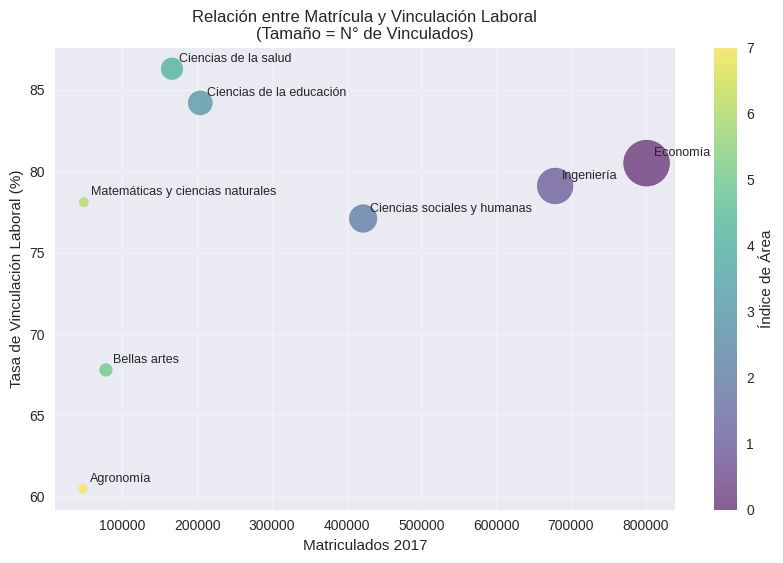

In [15]:
# 2. GRÁFICO DE DISPERSIÓN SIMPLIFICADO
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df_analisis['Matriculados 2017'],
                     df_analisis['Tasa vinculación (%)'],
                     s=df_analisis['Vinculados 2016']/100,  # Tamaño por número de vinculados
                     alpha=0.6,
                     c=range(len(df_analisis)),  # Para usar el colormap
                     cmap='viridis')

# Añadir etiquetas
for i, area in enumerate(df_analisis['Área de conocimiento']):
    plt.annotate(area.split(',')[0],  # Solo primera parte del nombre
                (df_analisis['Matriculados 2017'].iloc[i],
                 df_analisis['Tasa vinculación (%)'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Matriculados 2017')
plt.ylabel('Tasa de Vinculación Laboral (%)')
plt.title('Relación entre Matrícula y Vinculación Laboral\n(Tamaño = N° de Vinculados)')
plt.colorbar(scatter, label='Índice de Área')
plt.grid(True, alpha=0.3)
plt.show()

# Slide
* Datos contundentes


In [25]:
# Datos específicos para este argumento
economia = df_analisis[df_analisis['Área de conocimiento'] == 'Economía, administración, contaduría y afines']
salud = df_analisis[df_analisis['Área de conocimiento'] == 'Ciencias de la salud']

print(" COMPARATIVA: CONCENTRACIÓN vs EFICIENCIA ")
print(f" ECONOMÍA/ADMINISTRACIÓN:")
print(f"   • Matrícula: {economia['Porcentaje matrícula'].values[0]}% (1er lugar)")
print(f"   • Vinculación: {economia['Tasa vinculación (%)'].values[0]}% (4to lugar)")
print(f"   • Eficiencia: {economia['Eficiencia formación'].values[0]:.1f}%")

print(f"\n CIENCIAS DE LA SALUD:")
print(f"   • Matrícula: {salud['Porcentaje matrícula'].values[0]}% (5to lugar)")
print(f"   • Vinculación: {salud['Tasa vinculación (%)'].values[0]}% (1er lugar)")
print(f"   • Eficiencia: {salud['Eficiencia formación'].values[0]:.1f}%")

print(f"\n CONTRASTE:")
print(f"   • Economía tiene {economia['Porcentaje matrícula'].values[0]/salud['Porcentaje matrícula'].values[0]:.1f}x más matrícula")
print(f"   • Pero Salud tiene {salud['Tasa vinculación (%)'].values[0]-economia['Tasa vinculación (%)'].values[0]:.1f}% MÁS vinculación")

 COMPARATIVA: CONCENTRACIÓN vs EFICIENCIA 
 ECONOMÍA/ADMINISTRACIÓN:
   • Matrícula: 32.75% (1er lugar)
   • Vinculación: 80.5% (4to lugar)
   • Eficiencia: 13.7%

 CIENCIAS DE LA SALUD:
   • Matrícula: 6.8% (5to lugar)
   • Vinculación: 86.3% (1er lugar)
   • Eficiencia: 14.6%

 CONTRASTE:
   • Economía tiene 4.8x más matrícula
   • Pero Salud tiene 5.8% MÁS vinculación


#  GRÁFICO 1: CONCENTRACIÓN EDUCATIVA EXTREMA

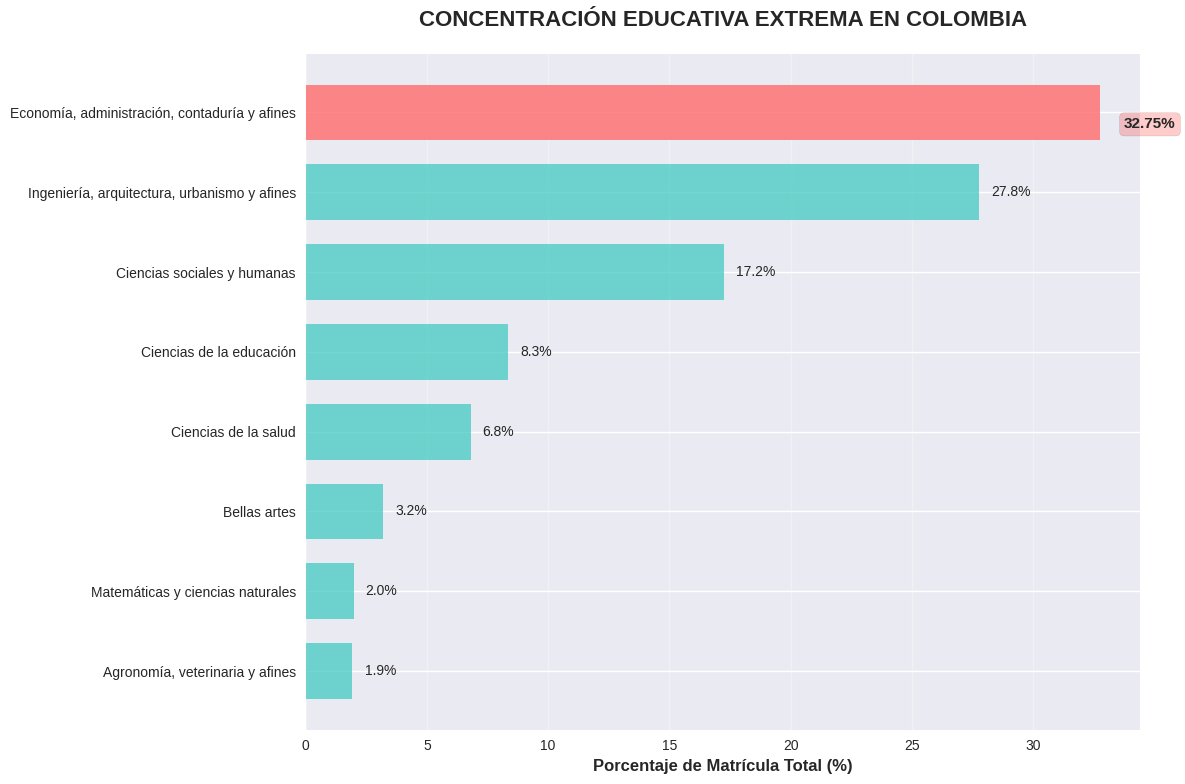

HALLAZGO: Economía/Administración concentra el 32.8% de toda la matrícula universitaria
   → Esto representa una SOBRE-OFERTA formativa en esta área


In [26]:
# GRÁFICO 1: CONCENTRACIÓN EDUCATIVA EXTREMA
plt.figure(figsize=(12, 8))

# Ordenar datos para mejor visualización
df_sorted = df_analisis.sort_values('Porcentaje matrícula', ascending=True)

# Colores diferenciados
colors = ['#FF6B6B' if x == 'Economía, administración, contaduría y afines'
         else '#4ECDC4' for x in df_sorted['Área de conocimiento']]

# Crear gráfico de barras horizontales
bars = plt.barh(df_sorted['Área de conocimiento'], df_sorted['Porcentaje matrícula'],
                color=colors, alpha=0.8, height=0.7)

# Personalización
plt.xlabel('Porcentaje de Matrícula Total (%)', fontsize=12, fontweight='bold')
plt.title('CONCENTRACIÓN EDUCATIVA EXTREMA EN COLOMBIA', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Destacar Economía/Administración
economia_val = df_sorted[df_sorted['Área de conocimiento'] == 'Economía, administración, contaduría y afines']['Porcentaje matrícula'].values[0]
plt.text(economia_val + 1, 6.8, f'{economia_val}%', fontweight='bold', fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.2))

# Añadir valores en las barras
for i, (valor, area) in enumerate(zip(df_sorted['Porcentaje matrícula'], df_sorted['Área de conocimiento'])):
    if area != 'Economía, administración, contaduría y afines':
        plt.text(valor + 0.5, i, f'{valor:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("HALLAZGO: Economía/Administración concentra el 32.8% de toda la matrícula universitaria")
print("   → Esto representa una SOBRE-OFERTA formativa en esta área")

# GRÁFICO 2: DEMOCRATIZACIÓN LABORAL

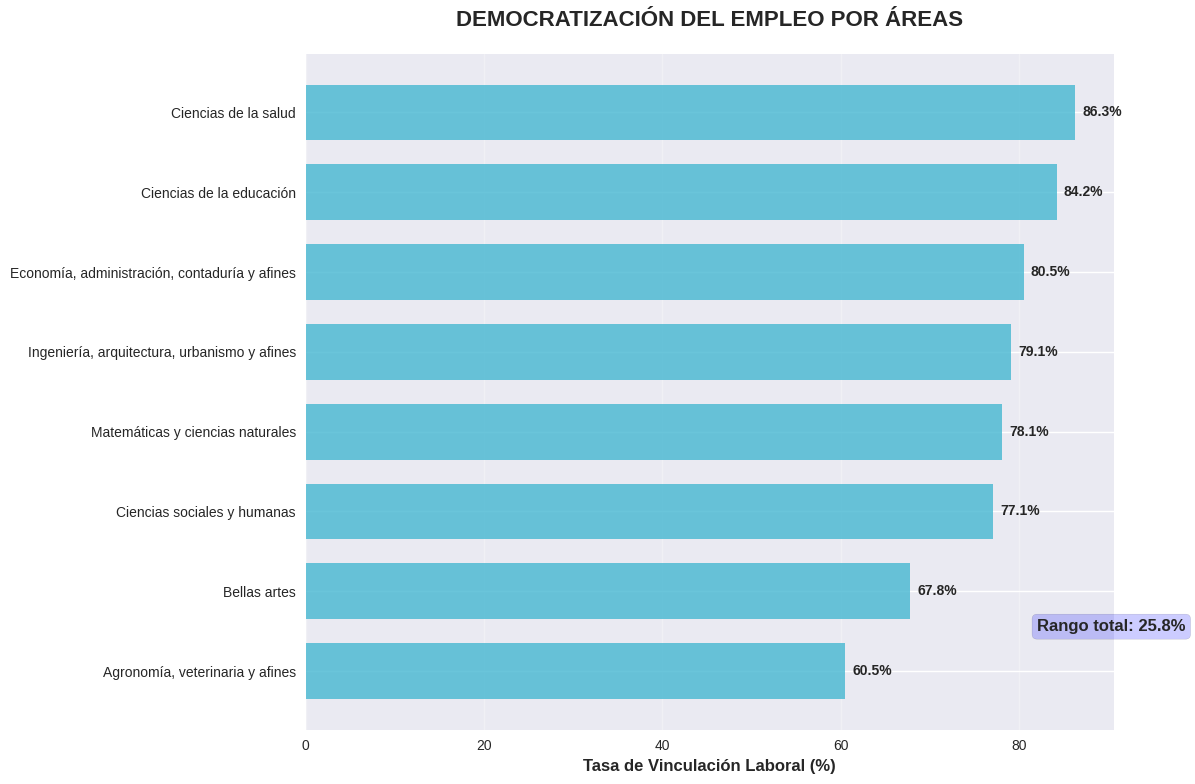

🟢 HALLAZGO: La vinculación laboral está más equilibrada entre áreas
   → Rango de variación: solo 25.8% entre el área con menor y mayor empleabilidad


In [21]:
# GRÁFICO 2: DEMOCRATIZACIÓN LABORAL
plt.figure(figsize=(12, 8))

# Ordenar por tasa de vinculación
df_sorted_vinc = df_analisis.sort_values('Tasa vinculación (%)', ascending=True)

# Crear gráfico
bars = plt.barh(df_sorted_vinc['Área de conocimiento'], df_sorted_vinc['Tasa vinculación (%)'],
                color='#45B7D1', alpha=0.8, height=0.7)

# Personalización
plt.xlabel('Tasa de Vinculación Laboral (%)', fontsize=12, fontweight='bold')
plt.title('DEMOCRATIZACIÓN DEL EMPLEO POR ÁREAS', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Calcular y mostrar rango
min_vinc = df_analisis['Tasa vinculación (%)'].min()
max_vinc = df_analisis['Tasa vinculación (%)'].max()
rango = max_vinc - min_vinc

plt.text(82, 0.5, f'Rango total: {rango:.1f}%', fontweight='bold', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='blue', alpha=0.2))

# Añadir valores en las barras
for i, (valor, area) in enumerate(zip(df_sorted_vinc['Tasa vinculación (%)'], df_sorted_vinc['Área de conocimiento'])):
    plt.text(valor + 0.8, i, f'{valor:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(" HALLAZGO: La vinculación laboral está más equilibrada entre áreas")
print(f"   → Rango de variación: solo {rango:.1f}% entre el área con menor y mayor empleabilidad")

#  GRÁFICO 3: MITO vs REALIDAD

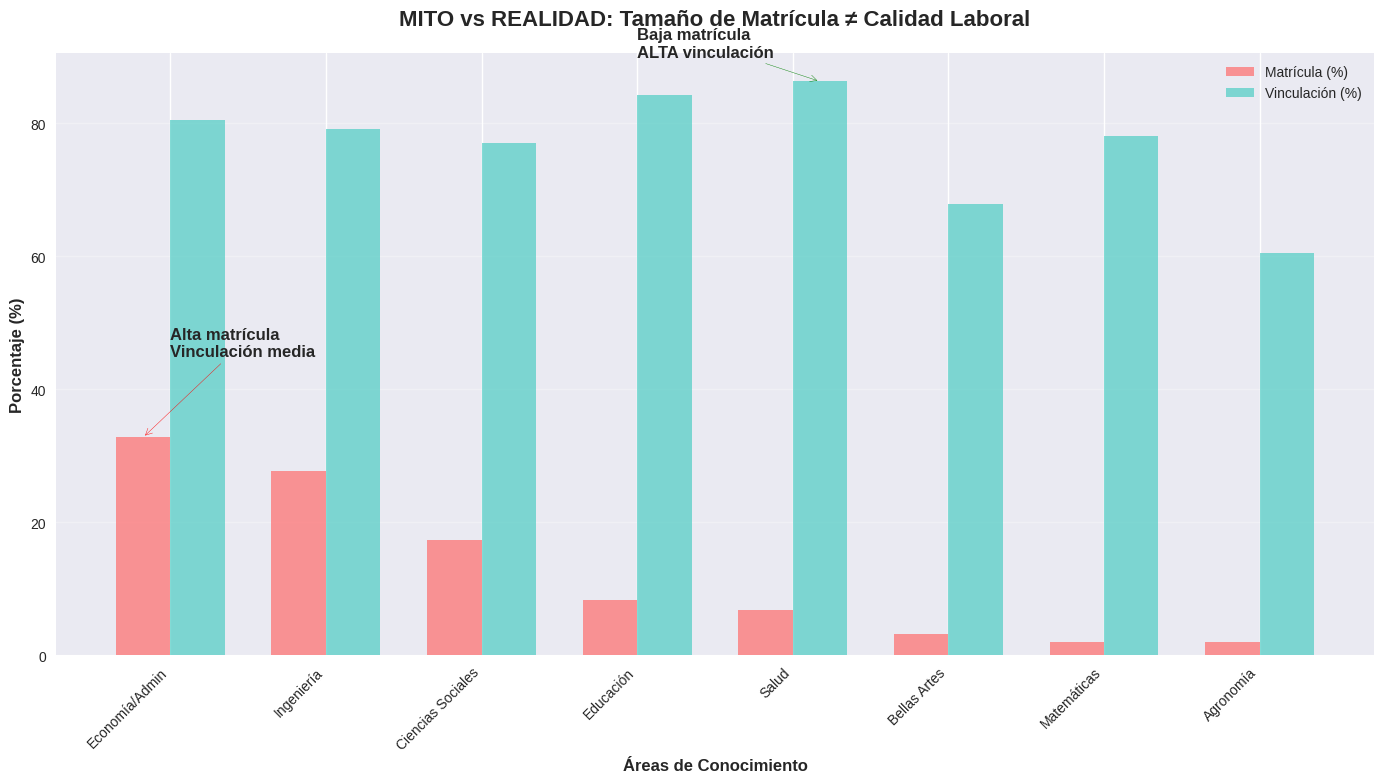

 HALLAZGO: No hay correlación entre tamaño de matrícula y tasa de vinculación
   → Ejemplo: Salud tiene 4.8x menos matrícula que Economía, pero 5.8% más vinculación


In [27]:
# GRÁFICO 3: MITO vs REALIDAD - Comparación directa
plt.figure(figsize=(14, 8))

# Nombres cortos para mejor visualización
nombres_cortos = []
for area in df_analisis['Área de conocimiento']:
    if 'Economía' in area:
        nombres_cortos.append('Economía/Admin')
    elif 'Ingeniería' in area:
        nombres_cortos.append('Ingeniería')
    elif 'Ciencias sociales' in area:
        nombres_cortos.append('Ciencias Sociales')
    elif 'Ciencias de la educación' in area:
        nombres_cortos.append('Educación')
    elif 'Ciencias de la salud' in area:
        nombres_cortos.append('Salud')
    elif 'Bellas artes' in area:
        nombres_cortos.append('Bellas Artes')
    elif 'Matemáticas' in area:
        nombres_cortos.append('Matemáticas')
    elif 'Agronomía' in area:
        nombres_cortos.append('Agronomía')
https://en.wikipedia.org/wiki/7_Assassins
x_pos = np.arange(len(nombres_cortos))
width = 0.35

# Crear barras agrupadas
bars1 = plt.bar(x_pos - width/2, df_analisis['Porcentaje matrícula'], width,
                label='Matrícula (%)', alpha=0.7, color='#FF6B6B')
bars2 = plt.bar(x_pos + width/2, df_analisis['Tasa vinculación (%)'], width,
                label='Vinculación (%)', alpha=0.7, color='#4ECDC4')

# Personalización
plt.xlabel('Áreas de Conocimiento', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje (%)', fontsize=12, fontweight='bold')
plt.title('MITO vs REALIDAD: Tamaño de Matrícula ≠ Calidad Laboral',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(x_pos, nombres_cortos, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Destacar casos contrastantes
plt.annotate('Alta matrícula\nVinculación media',
             xy=(0 - width/2, df_analisis.iloc[0]['Porcentaje matrícula']),
             xytext=(0, 45),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontweight='bold')

plt.annotate('Baja matrícula\nALTA vinculación',
             xy=(4 + width/2, df_analisis.iloc[4]['Tasa vinculación (%)']),
             xytext=(3, 90),
             arrowprops=dict(arrowstyle='->', color='green'),
             fontweight='bold')

plt.tight_layout()
plt.show()

print(" HALLAZGO: No hay correlación entre tamaño de matrícula y tasa de vinculación")
print("   → Ejemplo: Salud tiene 4.8x menos matrícula que Economía, pero 5.8% más vinculación")

In [30]:
import scipy.stats as stats
import numpy as np

print("ANÁLISIS ESTADÍSTICO BÁSICO COMPLEMENTARIO ")

# 1. ESTADÍSTICAS DESCRIPTIVAS COMPLETAS
print("\n1. 📊 ESTADÍSTICAS DESCRIPTIVAS POR VARIABLE")
variables_estadisticas = ['Matriculados 2017', 'Porcentaje matrícula',
                         'Tasa vinculación (%)', 'Eficiencia formación']

for var in variables_estadisticas:
    print(f"\n--- {var} ---")
    print(f"Media: {df_analisis[var].mean():.2f}")
    print(f"Mediana: {df_analisis[var].median():.2f}")
    print(f"Desviación estándar: {df_analisis[var].std():.2f}")
    print(f"Mínimo: {df_analisis[var].min():.2f}")
    print(f"Máximo: {df_analisis[var].max():.2f}")
    print(f"Coeficiente de variación: {(df_analisis[var].std()/df_analisis[var].mean()*100):.2f}%")

# 2. ANÁLISIS DE NORMALIDAD
print("\n2. PRUEBAS DE NORMALIDAD (Shapiro-Wilk)")
for var in variables_estadisticas:
    stat, p_value = stats.shapiro(df_analisis[var])
    print(f"{var}: p-value = {p_value:.4f} {'(Normal)' if p_value > 0.05 else '(No normal)'}")

# 3. CORRELACIONES ESTADÍSTICAMENTE SIGNIFICATIVAS
print("\n3.  CORRELACIONES SIGNIFICATIVAS")
from itertools import combinations

variables_corr = ['Matriculados 2017', 'Porcentaje matrícula', 'Tasa vinculación (%)',
                 'Graduados 2015', 'Vinculados 2016']

for var1, var2 in combinations(variables_corr, 2):
    corr_coef, p_value = stats.pearsonr(df_analisis[var1], df_analisis[var2])
    if p_value < 0.05:  # Solo mostrar correlaciones significativas
        print(f"{var1} vs {var2}: r = {corr_coef:.3f} (p = {p_value:.4f})")

# 4. ANÁLISIS DE CLÚSTERES NATURALES
print("\n4. IDENTIFICACIÓN DE GRUPOS NATURALES")
from sklearn.cluster import KMeans

# Estandarizar datos para clustering
from sklearn.preprocessing import StandardScaler
X = df_analisis[['Porcentaje matrícula', 'Tasa vinculación (%)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_analisis['Cluster'] = clusters

print("Agrupamiento por similitud (matrícula vs vinculación):")
for cluster_num in range(3):
    areas_cluster = df_analisis[df_analisis['Cluster'] == cluster_num]['Área de conocimiento'].tolist()
    print(f"\nCluster {cluster_num + 1}:")
    for area in areas_cluster:
        print(f"  - {area}")

# 5. ANÁLISIS DE OUTLIERS
print("\n5.  IDENTIFICACIÓN DE VALORES ATÍPICOS")
def detectar_outliers(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    outliers = serie[(serie < (Q1 - 1.5 * IQR)) | (serie > (Q3 + 1.5 * IQR))]
    return outliers

for var in ['Porcentaje matrícula', 'Tasa vinculación (%)']:
    outliers = detectar_outliers(df_analisis[var])
    if not outliers.empty:
        areas_outliers = df_analisis[df_analisis[var].isin(outliers)]['Área de conocimiento'].tolist()
        print(f"Outliers en {var}: {areas_outliers}")

# 6. ANÁLISIS DE CONCENTRACIÓN (ÍNDICE DE GINI)
print("\n6.  ANÁLISIS DE CONCENTRACIÓN")
def gini_coefficient(x):
    # Índice de Gini para concentración
    x = np.sort(x)
    n = len(x)
    return (2 * np.sum((np.arange(1, n+1) * x)) / (n * np.sum(x))) - (n + 1) / n

print(f"Índice de Gini - Matrícula: {gini_coefficient(df_analisis['Porcentaje matrícula']):.3f}")
print(f"Índice de Gini - Vinculación: {gini_coefficient(df_analisis['Tasa vinculación (%)']):.3f}")

# 7. ANÁLISIS DE TENDENCIA CENTRAL ROBUSTA
print("\n7.  MEDIDAS ROBUSTAS DE TENDENCIA CENTRAL")
for var in ['Porcentaje matrícula', 'Tasa vinculación (%)']:
    data = df_analisis[var]
    print(f"\n--- {var} ---")
    print(f"Media recortada (10%): {stats.trim_mean(data, 0.1):.2f}")
    print(f"Media winsorizada (10%): {stats.mstats.winsorize(data, limits=[0.1, 0.1]).mean():.2f}")
    print(f"Rango intercuartílico (IQR): {data.quantile(0.75) - data.quantile(0.25):.2f}")

# 8. PRUEBAS DE DIFERENCIAS ENTRE GRUPOS
print("\n8. 📊 COMPARACIÓN ENTRE ÁREAS CON ALTA Y BAJA MATRÍCULA")
mediana_matricula = df_analisis['Porcentaje matrícula'].median()
alta_matricula = df_analisis[df_analisis['Porcentaje matrícula'] > mediana_matricula]['Tasa vinculación (%)']
baja_matricula = df_analisis[df_analisis['Porcentaje matrícula'] <= mediana_matricula]['Tasa vinculación (%)']

t_stat, p_value = stats.ttest_ind(alta_matricula, baja_matricula)
print(f"¿Diferencias en vinculación entre áreas de alta vs baja matrícula?")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")
print(f"Media alta matrícula: {alta_matricula.mean():.2f}%")
print(f"Media baja matrícula: {baja_matricula.mean():.2f}%")

ANÁLISIS ESTADÍSTICO BÁSICO COMPLEMENTARIO 

1. 📊 ESTADÍSTICAS DESCRIPTIVAS POR VARIABLE

--- Matriculados 2017 ---
Media: 305789.25
Mediana: 185258.00
Desviación estándar: 295953.79
Mínimo: 47232.00
Máximo: 801289.00
Coeficiente de variación: 96.78%

--- Porcentaje matrícula ---
Media: 12.50
Mediana: 7.57
Desviación estándar: 12.09
Mínimo: 1.93
Máximo: 32.75
Coeficiente de variación: 96.76%

--- Tasa vinculación (%) ---
Media: 76.70
Mediana: 78.60
Desviación estándar: 8.56
Mínimo: 60.50
Máximo: 86.30
Coeficiente de variación: 11.15%

--- Eficiencia formación ---
Media: 11.31
Mediana: 10.30
Desviación estándar: 2.65
Mínimo: 8.23
Máximo: 14.79
Coeficiente de variación: 23.43%

2. PRUEBAS DE NORMALIDAD (Shapiro-Wilk)
Matriculados 2017: p-value = 0.0773 (Normal)
Porcentaje matrícula: p-value = 0.0775 (Normal)
Tasa vinculación (%): p-value = 0.2769 (Normal)
Eficiencia formación: p-value = 0.1282 (Normal)

3.  CORRELACIONES SIGNIFICATIVAS
Matriculados 2017 vs Porcentaje matrícula: r = 1.000

## Lectura deel análisis
### "La concentración educativa no se traduce en ventajas laborales"

* Economía domina la matrícula pero no la empleabilidad

"La empleabilidad es el gran ecualizador"

* Distribución más justa que la matrícula

Todas las áreas tienen oportunidades

"Necesitamos políticas diferenciadas por tipo de área"